In [35]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import os
import pickle
import xarray
import cartopy.feature as cfeature
from scipy.stats import linregress
import cartopy.crs as ccrs
import cartopy
import datetime
from ll_xy import lonlat_to_xy
import matplotlib.pyplot as plt
import kuka_tools as kt
import pickle
st=r'$^{\rm st}$'

In [2]:
freqs = ['ku','ka']

dates=[830,831,901,904,910,915,920,923]
hours = [15,13,18,11,15,18,13,18]

real_datetimes = [datetime.datetime(2023,
                                int(str(x)[0]),
                                int(str(x)[-2:]),
                                    h,0,0) for x,h in zip(dates,hours)]

ds8 = [(d-datetime.datetime(2023,8,1,0,0,0)).total_seconds() for d in real_datetimes]

real_dates = [x.date() for x in real_datetimes]

In [3]:
core_tops = [9.02,np.nan,21.77,19.8,15.38,np.nan,np.nan,13.65]

scrapings = np.array([(37.3+30.8)/2,
             34.22,
             28.47,
             np.nan,
             18.64,
             18.97,
             np.nan,#20th
             18.14,#23rd
            ])

# plt.scatter(tim)

In [4]:
weather = pickle.load(open('../../data/pickles/weather_df.p','rb'))
weather['t'] = [(d-datetime.datetime(2023,8,1,0,0,0)).total_seconds() for d in weather['dt']]

transect_temps = []

for t in ds8:
    
    min_ind = np.argmin(np.abs(weather['t']-t))
    
    transect_temps.append( weather['DRYBULB_TEMPERATURE'][min_ind] )

In [5]:
data = {'ku':{},'ka':{}}

for date in dates:
    
#     data['ku'][date] = pickle.load(open(f'../../data/pickles/NRCS_{date}_KU.p','rb'))
#     data['ka'][date] = pickle.load(open(f'../../data/pickles/NRCS_{date}_KA.p','rb'))
    
    
    data['ku'][date] = pd.read_pickle(f'../../data/pickles/NRCS_{date}_KU.p')
    data['ka'][date] = pd.read_pickle(f'../../data/pickles/NRCS_{date}_KA.p')

In [6]:
big_data = {}
for freq in freqs:
    vv_series = []
    for date in dates:
        
        df = data[freq][date]
#         df = df[df['speed']>0]
        vv = df[df['along_track']<23]['vv']
        vv_series.append(vv)
        
    big_data[freq]=vv_series

In [7]:
len(scrapings)

8

ku [1.0631743007528003, 1.9888332888594755, 1.7373100733339037, 1.1803861297541203, 0.7981944678184294, 0.936178535625866, 0.46574847239406847, 0.4675047804421103]


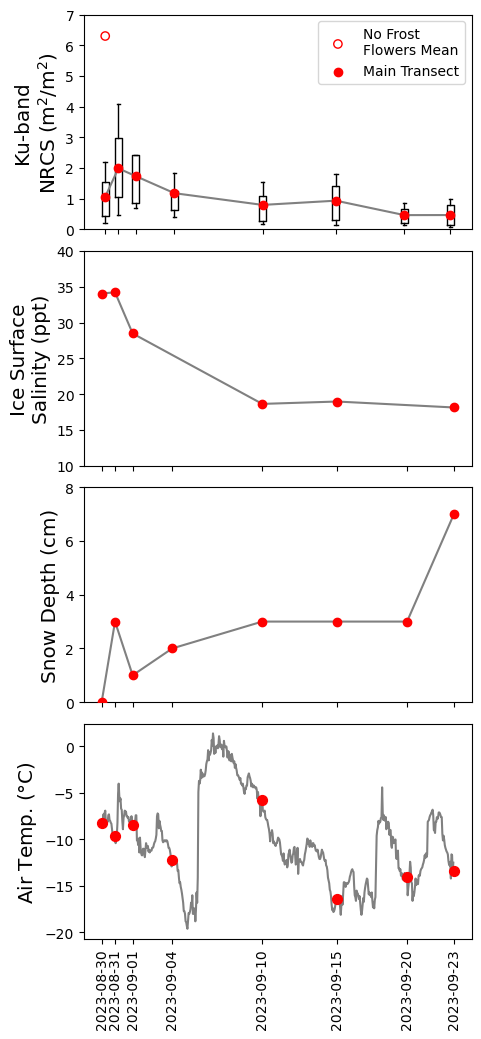

In [18]:
# vv_means

medianprops = dict(linestyle=None, linewidth=0., color='k')

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(5,12))

means = {}

for freq, ax in zip(['ku'],[ax1]):
    
    vv_series = big_data[freq]
    vv_means= [np.nanmean(x) for x in vv_series]
    means[freq]=vv_means
    ax.boxplot(vv_series,
               positions=ds8,
               medianprops=medianprops,
               whis=(10,90),
               showmeans=False,
               showfliers=False,
               widths=24*60*60/2,)
    
    print(freq,vv_means)
    
    
    ax.plot(ds8,vv_means,color='grey')
    ax.scatter(ds8,vv_means,color='r',zorder=10)
    
    # plt.xlabel('Days Since August 1st',fontsize='x-large')

    ax.set_xticks(ds8,labels=real_dates,rotation=90)

    ax.set_xticklabels([]) 

ax1.set_ylim(0,7)

ax2.set_ylim(10,40)

ax1.set_ylabel(f'Ku-band\nNRCS (m$^2$/m$^2$)',fontsize='x-large')

ax2.set_ylabel(f'Ice Surface\nSalinity (ppt)',fontsize='x-large')

ax1.scatter(ds8[:1],[6.30],facecolors='none', edgecolors='r',marker='o',label='No Frost\nFlowers Mean')

ax1.scatter([],[],color='r',marker='o',label='Main Transect')

ax1.legend()


ax2.plot(np.array(ds8)[~np.isnan(scrapings)],
         scrapings[~np.isnan(scrapings)],zorder=10,color='grey')

ax2.scatter(np.array(ds8)[~np.isnan(scrapings)],
         scrapings[~np.isnan(scrapings)],color='red',marker='o',zorder=10)

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xticks(ds8,labels=real_dates,rotation=90)
    
for ax in [ax1,ax2,ax3]:
    ax.set_xticklabels([])
    
snow_depths = [0,3,1,2,3,3,3,7]
ax3.plot(ds8,snow_depths,color='grey')
ax3.scatter(ds8,snow_depths,color='red',marker='o',zorder=10)
ax3.set_ylim(0,8)
ax3.set_ylabel('Snow Depth (cm)',fontsize='x-large')


weather = weather[(weather['t']>ds8[0]) & (weather['t']<ds8[-1])]
ax4.plot(weather['t'],weather['DRYBULB_TEMPERATURE'],color='grey',alpha=1)
ax4.scatter(ds8,transect_temps,marker='o',zorder=5,color='r',s=50)
ax4.set_ylabel(f'Air Temp. ($\degree$C)',fontsize='x-large')


plt.subplots_adjust(hspace=0.1)

overleaf_dir = '/home/robbie/Dropbox/Apps/Overleaf/NRCS/figures/'

plt.savefig(f'{overleaf_dir}timeseries.png',dpi=400,bbox_inches='tight')

plt.show()

LinregressResult(slope=0.05685150748810143, intercept=-0.2796818216713337, rvalue=0.7597107630993697, pvalue=0.0796713558582434, stderr=0.024330526917740222, intercept_stderr=0.6419849700448312)
LinregressResult(slope=-0.12932805236158285, intercept=1.4353184001169494, rvalue=-0.4823238047086588, pvalue=0.22611167527441745, stderr=0.09589126643019019, intercept_stderr=0.3216290852796733)
LinregressResult(slope=0.06112621101064746, intercept=1.752054577239719, rvalue=0.3958765846856678, pvalue=0.33163665589176594, stderr=0.05788664532098588, intercept_stderr=0.6653691553604717)
LinregressResult(slope=-0.0024715715563389962, intercept=1.760292101136455, rvalue=-0.9235063644037277, pvalue=0.0029818380298718395, stderr=0.0004591004926024066, intercept_stderr=0.15744354950636205)
LinregressResult(slope=-0.002009116084425337, intercept=1.5621052558952306, rvalue=-0.8299975219652093, pvalue=0.0107701755787489, stderr=0.0005511952754045158, intercept_stderr=0.1768180620384258)
LinregressResult

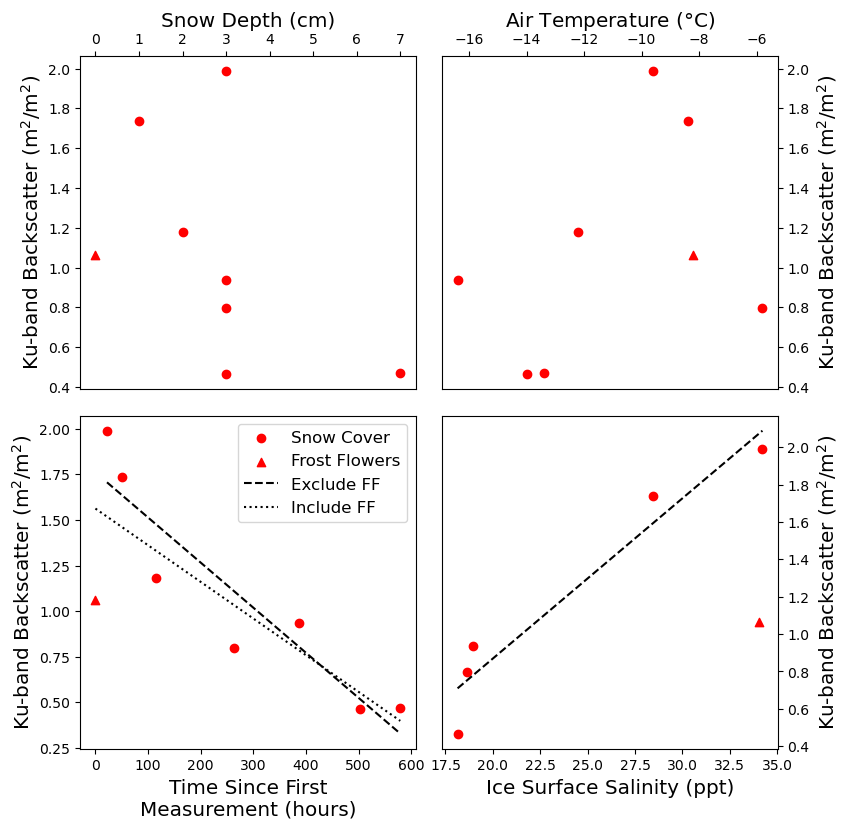

In [9]:
vv_series = big_data['ku']
ku_means= [np.nanmean(x) for x in vv_series]

time_in_hours = np.array(ds8)/(60*60)
time_in_hours = time_in_hours-time_in_hours[0]


fig, axs = plt.subplots(2,2,figsize=(9,9))

ax1,ax2,ax3,ax4 = axs.reshape(-1)


ax4.scatter(scrapings[1:],ku_means[1:],color='r',label='Snow Cover')
ax4.scatter(scrapings[:1],ku_means[:1],marker='^',label='Frost Flower',color='r')

x=scrapings[~np.isnan(scrapings)]
y=np.array(ku_means)[~np.isnan(scrapings)]
lr1 = linregress(x,y)
print(lr1)
if lr1[3]<0.05:
    ax1.plot([min(x),max(x)],
             np.array([min(x),max(x)])*lr1[0]+lr1[1],
             )


ax1.scatter(snow_depths[1:],ku_means[1:],color='r',label='Snow Cover')
ax1.scatter(snow_depths[:1],ku_means[:1],marker='^',label='Frost Flower',color='r')
lr1 = linregress(snow_depths,ku_means)
print(lr1)
if lr1[3]<0.05:
    ax1.plot([min(snow_depths),max(snow_depths)],
             np.array([min(snow_depths),max(snow_depths)])*lr1[0]+lr1[1],
             )


ax2.scatter(transect_temps[1:],ku_means[1:],color='r',label='Snow Cover')
ax2.scatter(transect_temps[:1],ku_means[:1],marker='^',label='Frost Flower',color='r')
lr1 = linregress(transect_temps,ku_means)
print(lr1)
if lr1[3]<0.05:
    ax1.plot([min(transect_temps),max(transect_temps)],
             np.array([min(transect_temps),max(transect_temps)])*lr1[0]+lr1[1],
             )


ax1.set_xlabel('Snow Depth (cm)',fontsize='x-large')
ax2.set_xlabel('Air Temperature ($\degree$C)',fontsize='x-large')
ax3.set_xlabel('Time Since First\nMeasurement (hours)',fontsize='x-large')
ax4.set_xlabel('Ice Surface Salinity (ppt)',fontsize='x-large')

ax1.set_ylabel('Ku-band Backscatter (m$^2$/m$^2$)',fontsize='x-large')
ax3.set_ylabel('Ku-band Backscatter (m$^2$/m$^2$)',fontsize='x-large')


ax3.scatter(time_in_hours[1:],ku_means[1:],color='r',label='Snow Cover')
ax3.scatter(time_in_hours[:1],ku_means[:1],marker='^',label='Frost Flowers',color='r')

### TIME CORRELATION ###

x=np.array(time_in_hours[1:]).copy()
y=np.array(ku_means[1:]).copy()
lr1 = linregress(x,y)
print(lr1)
if lr1[3]<0.05:
    ax3.plot([min(x),max(x)],
             np.array([min(x),max(x)])*lr1[0]+lr1[1],
             c='k',ls='--',label='Exclude FF'
             )
    
    
x=np.array(time_in_hours[:]).copy()
y=np.array(ku_means[:]).copy()
lr1 = linregress(x,y)
print(lr1)
if lr1[3]<0.05:
    ax3.plot([min(x),max(x)],
             np.array([min(x),max(x)])*lr1[0]+lr1[1],
             c='k',ls=':',label='Include FF',
             )
    
###############################


### ICE SURFACE SALINITY ###

x=np.array(scrapings[1:].copy())
y=np.array(ku_means[1:].copy())

y=y[~np.isnan(x)]
x=x[~np.isnan(x)]

lr1 = linregress(x,y)
print(lr1)
if lr1[3]<0.05:
    ax4.plot([min(x),max(x)],
             np.array([min(x),max(x)])*lr1[0]+lr1[1],
             c='k',ls='--',
             )
    
    
x=np.array(scrapings[:].copy())
y=np.array(ku_means[:].copy())

y=y[~np.isnan(x)]
x=x[~np.isnan(x)]

lr1 = linregress(x,y)
print(lr1)
if lr1[3]<0.05:
    ax4.plot([min(x),max(x)],
             np.array([min(x),max(x)])*lr1[0]+lr1[1],
             c='k',ls=':',
             )
    
###############################


for ax in [ax1,ax2]:
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

for ax in [ax2,ax4]:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax.set_ylabel('Ku-band Backscatter (m$^2$/m$^2$)',fontsize='x-large')

ax3.legend(fontsize='large')

plt.subplots_adjust(hspace=0.08,wspace=0.08)


overleaf_dir = '/home/robbie/Dropbox/Apps/Overleaf/NRCS/figures/'

plt.savefig(f'{overleaf_dir}correlations.png',dpi=400,bbox_inches='tight')

plt.show()

LinregressResult(slope=0.05685150748810143, intercept=-0.2796818216713337, rvalue=0.7597107630993697, pvalue=0.0796713558582434, stderr=0.024330526917740222, intercept_stderr=0.6419849700448312)
LinregressResult(slope=-0.0024715715563389962, intercept=1.760292101136455, rvalue=-0.9235063644037277, pvalue=0.0029818380298718395, stderr=0.0004591004926024066, intercept_stderr=0.15744354950636205)
LinregressResult(slope=-0.002009116084425337, intercept=1.5621052558952306, rvalue=-0.8299975219652093, pvalue=0.0107701755787489, stderr=0.0005511952754045158, intercept_stderr=0.1768180620384258)
LinregressResult(slope=0.0857900547552206, intercept=-0.8465905878257085, rvalue=0.9651409085412551, pvalue=0.007771842215664171, stderr=0.013431993524119694, intercept_stderr=0.32999646679001987)
LinregressResult(slope=0.05685150748810143, intercept=-0.2796818216713337, rvalue=0.7597107630993697, pvalue=0.0796713558582434, stderr=0.024330526917740222, intercept_stderr=0.6419849700448312)


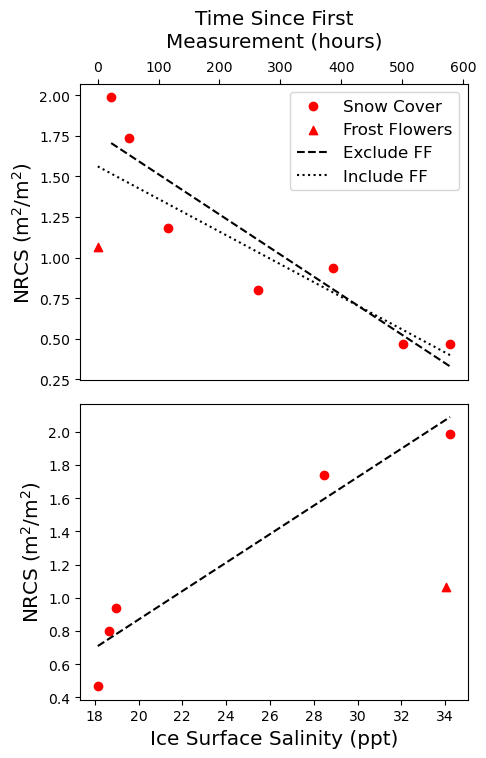

In [10]:
vv_series = big_data['ku']
ku_means= [np.nanmean(x) for x in vv_series]

time_in_hours = np.array(ds8)/(60*60)
time_in_hours = time_in_hours-time_in_hours[0]


fig, (ax3,ax4) = plt.subplots(2,1,figsize=(5,8))

ax4.scatter(scrapings[1:],ku_means[1:],color='r',label='Snow Cover')
ax4.scatter(scrapings[:1],ku_means[:1],marker='^',label='Frost Flower',color='r')

x=scrapings[~np.isnan(scrapings)]
y=np.array(ku_means)[~np.isnan(scrapings)]
lr1 = linregress(x,y)
print(lr1)
if lr1[3]<0.05:
    ax1.plot([min(x),max(x)],
             np.array([min(x),max(x)])*lr1[0]+lr1[1],
             )

ax3.set_xlabel('Time Since First\nMeasurement (hours)',fontsize='x-large',labelpad=10)
ax4.set_xlabel('Ice Surface Salinity (ppt)',fontsize='x-large')

# ax1.set_ylabel('Ku-band Backscatter (m$^2$/m$^2$)',fontsize='x-large')
ax3.set_ylabel('Ku-band Backscatter (m$^2$/m$^2$)',fontsize='x-large')


ax3.scatter(time_in_hours[1:],ku_means[1:],color='r',label='Snow Cover')
ax3.scatter(time_in_hours[:1],ku_means[:1],marker='^',label='Frost Flowers',color='r')

### TIME CORRELATION ###

x=np.array(time_in_hours[1:]).copy()
y=np.array(ku_means[1:]).copy()
lr1 = linregress(x,y)
print(lr1)
if lr1[3]<0.05:
    ax3.plot([min(x),max(x)],
             np.array([min(x),max(x)])*lr1[0]+lr1[1],
             c='k',ls='--',label='Exclude FF'
             )
    
    
x=np.array(time_in_hours[:]).copy()
y=np.array(ku_means[:]).copy()
lr1 = linregress(x,y)
print(lr1)
if lr1[3]<0.05:
    ax3.plot([min(x),max(x)],
             np.array([min(x),max(x)])*lr1[0]+lr1[1],
             c='k',ls=':',label='Include FF',
             )
    
###############################


### ICE SURFACE SALINITY ###

x=np.array(scrapings[1:].copy())
y=np.array(ku_means[1:].copy())

y=y[~np.isnan(x)]
x=x[~np.isnan(x)]

lr1 = linregress(x,y)
print(lr1)
if lr1[3]<0.05:
    ax4.plot([min(x),max(x)],
             np.array([min(x),max(x)])*lr1[0]+lr1[1],
             c='k',ls='--',
             )
    
    
x=np.array(scrapings[:].copy())
y=np.array(ku_means[:].copy())

y=y[~np.isnan(x)]
x=x[~np.isnan(x)]

lr1 = linregress(x,y)
print(lr1)
if lr1[3]<0.05:
    ax4.plot([min(x),max(x)],
             np.array([min(x),max(x)])*lr1[0]+lr1[1],
             c='k',ls=':',
             )
    
###############################


for ax in [ax3]:
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

# for ax in [ax2,ax4]:
#     ax.yaxis.tick_right()
#     ax.yaxis.set_label_position('right')
#     ax.set_ylabel('Ku-band Backscatter (m$^2$/m$^2$)',fontsize='x-large')

for ax in [ax3,ax4]:    ax.set_ylabel('NRCS (m$^2$/m$^2$)',fontsize='x-large')

ax3.legend(fontsize='large')

plt.subplots_adjust(hspace=0.08,wspace=0.08)


overleaf_dir = '/home/robbie/Dropbox/Apps/Overleaf/NRCS/figures/'

plt.savefig(f'{overleaf_dir}correlations_a.png',dpi=400,bbox_inches='tight')

plt.show()

LinregressResult(slope=0.05685150748810143, intercept=-0.2796818216713337, rvalue=0.7597107630993697, pvalue=0.0796713558582434, stderr=0.024330526917740222, intercept_stderr=0.6419849700448312)
LinregressResult(slope=-0.12932805236158285, intercept=1.4353184001169494, rvalue=-0.4823238047086588, pvalue=0.22611167527441745, stderr=0.09589126643019019, intercept_stderr=0.3216290852796733)
LinregressResult(slope=0.06112621101064746, intercept=1.752054577239719, rvalue=0.3958765846856678, pvalue=0.33163665589176594, stderr=0.05788664532098588, intercept_stderr=0.6653691553604717)


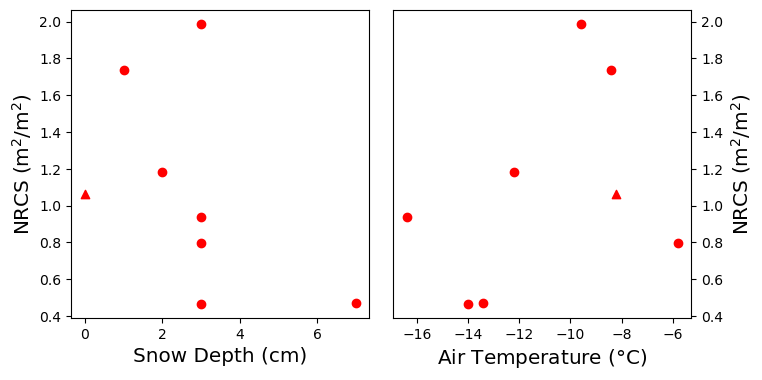

In [11]:
vv_series = big_data['ku']
ku_means= [np.nanmean(x) for x in vv_series]

time_in_hours = np.array(ds8)/(60*60)
time_in_hours = time_in_hours-time_in_hours[0]


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))

ax4.scatter(scrapings[1:],ku_means[1:],color='r',label='Snow Cover')
ax4.scatter(scrapings[:1],ku_means[:1],marker='^',label='Frost Flower',color='r')

x=scrapings[~np.isnan(scrapings)]
y=np.array(ku_means)[~np.isnan(scrapings)]
lr1 = linregress(x,y)
print(lr1)
if lr1[3]<0.05:
    ax1.plot([min(x),max(x)],
             np.array([min(x),max(x)])*lr1[0]+lr1[1],
             )


ax1.scatter(snow_depths[1:],ku_means[1:],color='r',label='Snow Cover')
ax1.scatter(snow_depths[:1],ku_means[:1],marker='^',label='Frost Flower',color='r')
lr1 = linregress(snow_depths,ku_means)
print(lr1)
if lr1[3]<0.05:
    ax1.plot([min(snow_depths),max(snow_depths)],
             np.array([min(snow_depths),max(snow_depths)])*lr1[0]+lr1[1],
             )


ax2.scatter(transect_temps[1:],ku_means[1:],color='r',label='Snow Cover')
ax2.scatter(transect_temps[:1],ku_means[:1],marker='^',label='Frost Flower',color='r')
lr1 = linregress(transect_temps,ku_means)
print(lr1)
if lr1[3]<0.05:
    ax1.plot([min(transect_temps),max(transect_temps)],
             np.array([min(transect_temps),max(transect_temps)])*lr1[0]+lr1[1],
             )


ax1.set_xlabel('Snow Depth (cm)',fontsize='x-large')
ax2.set_xlabel('Air Temperature ($\degree$C)',fontsize='x-large')


for ax in [ax1,ax2]:    ax.set_ylabel('NRCS (m$^2$/m$^2$)',fontsize='x-large')

ax3.legend(fontsize='large')

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')

plt.subplots_adjust(hspace=0.08,wspace=0.08)

overleaf_dir = '/home/robbie/Dropbox/Apps/Overleaf/NRCS/figures/'

plt.savefig(f'{overleaf_dir}correlations_b.png',dpi=400,bbox_inches='tight')

plt.show()

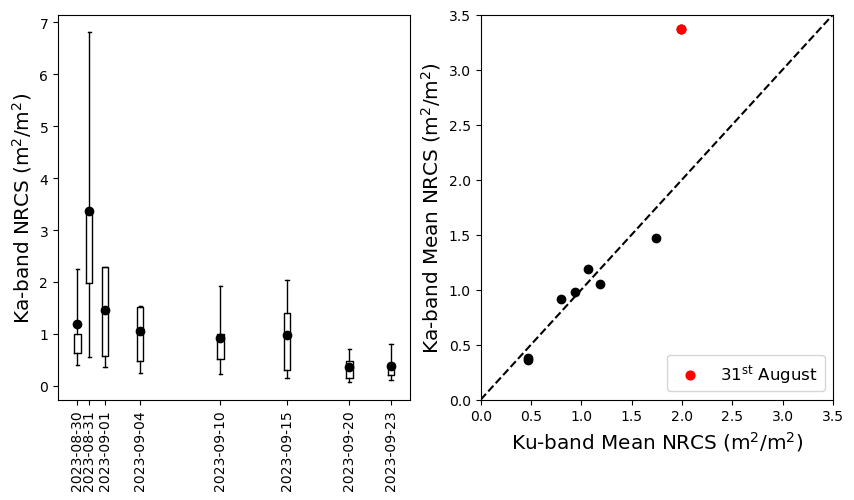

In [45]:
freq = 'ka'
vv_series = big_data[freq]
vv_means= [np.nanmean(x) for x in vv_series]
means[freq]=vv_means


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.boxplot(vv_series,
           positions=ds8,
           medianprops=medianprops,
           whis=(10,90),
           showmeans=False,
           showfliers=False,
           widths=24*60*60/2,)

ax1.scatter(ds8,means['ka'],color='k')


ax1.set_xticks(ds8,labels=real_dates,rotation=90)

ax1.set_ylabel('Ka-band NRCS (m$^2$/m$^2$)',fontsize='x-large')



ax2.scatter(means['ku'],means['ka'],color='k')
ax2.scatter(means['ku'][1:2],means['ka'][1:2],color='r',s=40,label=f'31{st} August')
ax2.plot([0,4],[0,4],color='k',ls='--')
ax2.set_xlim(0,3.5)
ax2.set_ylim(0,3.5)
ax2.set_ylabel('Ka-band Mean NRCS (m$^2$/m$^2$)',fontsize='x-large')
ax2.set_xlabel('Ku-band Mean NRCS (m$^2$/m$^2$)',fontsize='x-large')
ax2.legend(fontsize='large',loc='lower right')

overleaf_dir = '/home/robbie/Dropbox/Apps/Overleaf/NRCS/figures/'

plt.savefig(f'{overleaf_dir}ak_insitu.png',dpi=400,bbox_inches='tight')

In [ ]:
plt.scatter(transect_temps,means['ka'])
plt.scatter(transect_temps,means['ku'])

In [ ]:
data = {}

for date in dates:

    data[date] = {}
    
    x = pd.read_pickle(f'../../data/pickles/NRCS_{date}_KU.p')
    
    data[date]=x
#     data[date]['along_track'] = x[0]
#     data[date]['nrcs'] = x[1]
#     data[date]['starttime']=min
#     data[date]['endtime']=max

vv_series = []

for date in dates:
    df = data[date]
    
    df = df[df['speed']>0]
    
    vv = df[df['along_track']<25]['vv']
    
    vv_series.append(vv)
    
vv_means= [np.nanmean(x) for x in vv_series]

vv_means

plt.figure(figsize=(12,5))
plt.violinplot(vv_series,positions=ds8,showextrema=False,widths=1,showmeans=True)
plt.plot(ds8,vv_means)
plt.ylim(0,6)
# plt.xlabel('Days Since August 1st',fontsize='x-large')

plt.xticks(ds8,labels=real_dates,rotation=90)

plt.show()

In [14]:
nrcs_means = {}

for date in dates:
    print(date)

    start_time = data[date]['starttime']
    end_time = data[date]['endtime']

    along_track = data[date]['along_track']
    nrcs = data[date]['nrcs']

    nrcs_means[date] = {}
    for pol in nrcs.keys():

        raw_values = nrcs[pol]
        at, rv = along_track[start_time:end_time],nrcs[pol][start_time:end_time]
        
        raw_in_range = rv[(at<25) & (at>0)]
        along_in_range = at[(at<25) & (at>0)]

        bs = binned_statistic(along_in_range,raw_in_range,
                      statistic='mean',bins=np.arange(0,25.1,1))

        mean_power = np.nanmean(bs[0])

        nrcs_means[date][pol] = mean_power
        
    

830
831
901
904
910
915
920
923
